#### **Import needed libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif, RFE
from sklearn.decomposition import PCA

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

**Read-data**

In [2]:
df = pd.read_csv("Breast_Cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### **Preprocessing**

**Drop unneeded columns**

In [5]:
df.drop('Unnamed: 32', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

**Encoding target column**

In [6]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

**Define Features X and Target y**

In [7]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

**Check Balance**

In [8]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

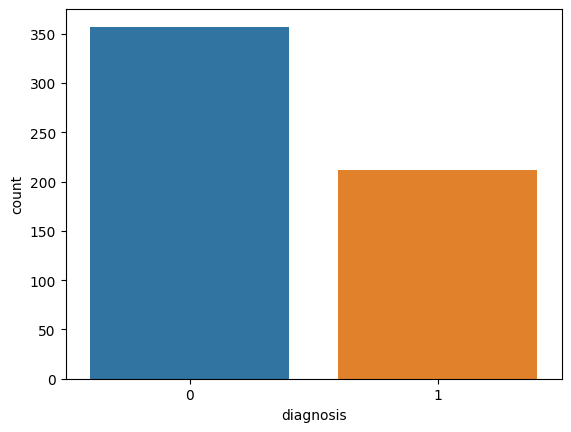

In [9]:
sns.countplot(x='diagnosis', data=df)
plt.show()

**Handling Balance data**

In [10]:
smote = SMOTE(k_neighbors=5)

X, y = smote.fit_resample(X, y)

y.value_counts()

diagnosis
1    357
0    357
Name: count, dtype: int64

**Data Scaling**

In [11]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

**Data Spliting**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **SVM Model**

**Apply GridSearch**

In [13]:
param_grid = {'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf'], 
            'gamma': ['auto', 'scale']}

**Apply Model**

In [14]:
svc = SVC(random_state=42)

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [15]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.9842410373760486


**Create model with best hyperparameters**

In [16]:
svc = SVC(C=10, kernel='rbf', gamma='scale')
svc.fit(X_train, y_train)

SVC(C=10)

In [17]:
# get prediction
y_pred = svc.predict(X_test)

In [18]:
print(f'the accuracy = {accuracy_score(y_test, y_pred)}')

the accuracy = 0.9790209790209791


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.97      0.99      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



#### **Feature Selections**

**1. Pearson Correlation(f_regression)**

In [20]:
fsm = SelectKBest(f_regression, k=8)
fsm.fit(X_train, y_train)

X_train_selected = fsm.transform(X_train)
X_test_selected = fsm.transform(X_test)

In [21]:
X_train_selected.shape

(571, 8)

In [22]:
mask = fsm.get_support()
mask

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [23]:
fsm.get_feature_names_out()

array(['x0', 'x2', 'x6', 'x7', 'x20', 'x22', 'x23', 'x27'], dtype=object)

In [24]:
#build_model with new features
svc = SVC(random_state=42)

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [25]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.9666971777269261


In [26]:
svc = SVC(C=10, kernel='poly', gamma='scale')
svc.fit(X_train_selected, y_train)

SVC(C=10, kernel='poly')

In [27]:
# get prediction
y_pred = svc.predict(X_test_selected)

In [28]:
print(f'the accuracy = {accuracy_score(y_test, y_pred)}')

the accuracy = 0.972027972027972


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.97      0.97      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



**2. CHi-Square**

In [30]:
fsm = SelectKBest(chi2, k=8)
fsm.fit(X_train ,y_train)

X_train_selected = fsm.transform(X_train)
X_test_selected = fsm.transform(X_test)

In [31]:
mask = fsm.get_support()
mask

array([False, False, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False])

In [32]:
fsm.get_feature_names_out()

array(['x3', 'x6', 'x7', 'x20', 'x22', 'x23', 'x26', 'x27'], dtype=object)

In [33]:
# build_model with new features
svc = SVC(random_state=42)

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [34]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best score:  0.9719603356216627


In [35]:
svc = SVC(C=10, kernel='poly', gamma='scale')
svc.fit(X_train_selected, y_train)

SVC(C=10, kernel='poly')

In [36]:
# get prediction
y_pred = svc.predict(X_test_selected)

In [37]:
print(f'the accuracy = {accuracy_score(y_test, y_pred)}')

the accuracy = 0.972027972027972


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.97      0.97      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



**3. ANNOVA(f_classif)**

In [39]:
fsm = SelectKBest(f_classif, k=8)
fsm.fit(X_train, y_train)

X_train_selected = fsm.transform(X_train)
X_test_selected = fsm.transform(X_test)

In [40]:
mask = fsm.get_support()
mask

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [41]:
fsm.get_feature_names_out()

array(['x0', 'x2', 'x6', 'x7', 'x20', 'x22', 'x23', 'x27'], dtype=object)

In [42]:
# build_model with new features
svc = SVC(random_state=42)

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [43]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.9666971777269261


In [44]:
svc = SVC(C=10, kernel='poly', gamma='scale')
svc.fit(X_train_selected, y_train)

SVC(C=10, kernel='poly')

In [45]:
# get prediction
y_pred = svc.predict(X_test_selected)

In [46]:
print(f'the accuracy = {accuracy_score(y_test, y_pred)}')

the accuracy = 0.972027972027972


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.97      0.97      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



**4. Recursive Feature Elimination (RFE) - backward selection wrapper method**

In [48]:
svm = LinearSVC(C=10)

rfe = RFE(svm, n_features_to_select=8)
rfe.fit(X_train, y_train)

RFE(estimator=LinearSVC(C=10), n_features_to_select=8)

In [49]:
mask = rfe.get_support()
mask

array([False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
        True, False, False])

In [50]:
y_pred = rfe.predict(X_test)

In [51]:
print(f'the accuracy = {accuracy_score(y_test, y_pred)}')

the accuracy = 0.972027972027972


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.99      0.96      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



**5. Tree-based Algorithms**

In [53]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [54]:
# Retrieve feature importances
importances = clf.feature_importances_

In [55]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [56]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. Feature 23 (0.15757281667558687)
2. Feature 27 (0.120205889093532)
3. Feature 7 (0.11060374354864996)
4. Feature 22 (0.1017051162481238)
5. Feature 6 (0.07684524260261162)
6. Feature 2 (0.06861924391845343)
7. Feature 20 (0.06014093321021944)
8. Feature 3 (0.045817317242425305)
9. Feature 26 (0.04512915362055217)
10. Feature 0 (0.04035136901374362)
11. Feature 13 (0.02321500987988254)
12. Feature 25 (0.021359731266086722)
13. Feature 21 (0.016015253968639384)
14. Feature 10 (0.01433848823501968)
15. Feature 24 (0.01379241428061045)
16. Feature 1 (0.012785317747289145)
17. Feature 5 (0.012067546060968767)
18. Feature 12 (0.009024684057940083)
19. Feature 28 (0.008875728507003553)
20. Feature 15 (0.005295944000587709)
21. Feature 16 (0.004882325172492804)
22. Feature 9 (0.004547776433784151)
23. Feature 14 (0.004500363654446773)
24. Feature 4 (0.004194991088308425)
25. Feature 29 (0.003885111626567369)
26. Feature 8 (0.0034610036067741633)
27. Feature 19 (0.0031023539

In [57]:
# Select the top N features
selected_features = indices[:8]
selected_features

array([23, 27,  7, 22,  6,  2, 20,  3], dtype=int64)

In [58]:
# Create selected features data
X_selected = X[:, selected_features]

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [60]:
svc = SVC(C=10, kernel='poly', gamma='scale')
svc.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [61]:
# get prediction
y_pred = svc.predict(X_test)

In [62]:
print(f'the accuracy = {accuracy_score(y_test, y_pred)}')

the accuracy = 0.972027972027972


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.97      0.97      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



#### **Feature Extraction**

In [64]:
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape, X_test.shape

((571, 8), (143, 8))

In [65]:
pca.components_

array([[ 0.28163976,  0.44795651,  0.39488414,  0.34690989,  0.34650272,
         0.33743355,  0.35188608,  0.2932315 ],
       [-0.29680202,  0.45482914,  0.27025835, -0.26519275,  0.50942959,
        -0.2951755 , -0.3327483 , -0.32296087],
       [-0.01832146, -0.72472845,  0.26401337, -0.09141261,  0.57014853,
         0.13960966, -0.1235253 ,  0.19119351],
       [ 0.38320325, -0.03168033, -0.59172573,  0.2222143 ,  0.48473549,
        -0.36040399,  0.21591516, -0.20286496],
       [ 0.42232423, -0.19196745,  0.58620891,  0.06807478, -0.23824025,
        -0.53535639,  0.15059121, -0.2654677 ],
       [ 0.49509103,  0.17118477, -0.08562988, -0.48304904, -0.02190294,
        -0.19681338, -0.31987626,  0.5859827 ],
       [ 0.0272713 ,  0.0040449 ,  0.0109417 ,  0.70268924, -0.05334863,
        -0.11757043, -0.68459749,  0.14144051],
       [ 0.5110681 ,  0.00763875, -0.0095634 , -0.14088347, -0.01718364,
         0.55719239, -0.33151868, -0.54602946]])

In [66]:
pca.explained_variance_ratio_ * 100

array([8.63267830e+01, 9.90565322e+00, 2.29439060e+00, 7.30172562e-01,
       4.94445493e-01, 1.84445247e-01, 5.24074002e-02, 1.17024814e-02])

In [67]:
svc = SVC(C=10, kernel='poly', gamma='scale')
svc.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [68]:
# get prediction
y_pred = svc.predict(X_test)

In [69]:
print(f'the accuracy = {accuracy_score(y_test, y_pred)}')

the accuracy = 0.8811188811188811


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        69
           1       0.83      0.97      0.89        74

    accuracy                           0.88       143
   macro avg       0.90      0.88      0.88       143
weighted avg       0.89      0.88      0.88       143

